                                                            DA-1



                                                   ## NAME - Mitali Chauhan
                                                   ## REG. NO. - 18BCE7178
                                                          (PART-1)

### Importing libraries and packages

In [31]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

### 1. Create a dataset with the content of the file
### 2. Drop columns titled Name, SMILES and KOW type

In [32]:
#importing dataset and dropping columns named Name,SMILES, KOW type

dataset=pd.read_csv('Documents\QSAR_BCF_Kow.csv')
DS=dataset.drop(columns=['Name','SMILES','KOW type'])
DS


,CAS,LogKOW,logBCF
0,105-67-9,2.30,1.18
1,108-39-4,1.96,1.03
2,113136-77-9,1.98,-0.40
3,114311-32-9,1.02,-1.00
4,1689-84-5,2.99,0.84
...,...,...,...
1049,V-Mey_NA_04,6.46,3.71
1050,V-Mey_NA_05,6.51,3.92
1051,V-Mey_NA_06,8.21,3.76
1052,V-Mey_NA_07,9.14,3.19


### 3. Remove the values in column titled “LogKOW” corresponding to the values starting with V-Mey_NA in the column titled “CAS”.

In [33]:
#Updating LogKOW values based on CAS values('V_MEY_NA')
c=0
for i in DS['CAS']:
    c+=1
    if i[0:8]== 'V-Mey_NA':
        DS['LogKOW'][c] = np.NaN
DS

C:\Users\robin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CAS,LogKOW,logBCF
0,105-67-9,2.30,1.18
1,108-39-4,1.96,1.03
2,113136-77-9,1.98,-0.40
3,114311-32-9,1.02,-1.00
4,1689-84-5,2.99,0.84
...,...,...,...
1049,V-Mey_NA_04,NaN,3.71
1050,V-Mey_NA_05,NaN,3.92
1051,V-Mey_NA_06,NaN,3.76
1052,V-Mey_NA_07,NaN,3.19


### 4. Check for missing values. If available, fill it with zeros, ones and mean of column.
### 5. Remove the column titled “CAS”.

In [34]:
#fitting mean values into NaN values
x=DS['LogKOW'].mean()
DS=DS.fillna(value=x)
DS.drop(columns=['CAS'])

,LogKOW,logBCF
0,2.300000,1.18
1,1.960000,1.03
2,1.980000,-0.40
3,1.020000,-1.00
4,2.990000,0.84
...,...,...
1049,3.839312,3.71
1050,3.839312,3.92
1051,3.839312,3.76
1052,3.839312,3.19


### 6. Normalize the values using min-max normalization.

In [35]:
#max min normalization of two data columns
DS['LogKOW']=((DS['LogKOW']-DS['LogKOW'].min())/(DS['LogKOW'].max()-DS['LogKOW'].min()))
DS['logBCF']=((DS['logBCF']-DS['logBCF'].min())/(DS['logBCF'].max()-DS['logBCF'].min()))

### 7. Perform linearity analysis on the resultant dataset.

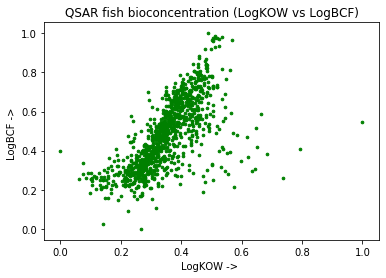

In [36]:
# Scatter Plot
plt.scatter(DS['LogKOW'],DS['logBCF'],s=7,c='g',marker='o')
plt.title("QSAR fish bioconcentration (LogKOW vs LogBCF)")
plt.xlabel("LogKOW -> ")
plt.ylabel("LogBCF -> ")

plt.show()

,LogKOW,logBCF
LogKOW,1.000000,0.664487
logBCF,0.664487,1.000000


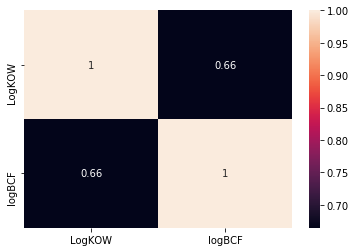

In [37]:
import seaborn as sb
data_corr = DS.corr()
sb.heatmap(data_corr,annot=True)
data_corr


### 8. Construct a regression equation, y=mx+c with LogKOW as independen attribute(x) and logBCF as dependent attribute(y).


In [38]:
# Calculating Coefficient and intercept
from sklearn import linear_model
regress = linear_model.LinearRegression()
train_x = np.asanyarray(DS[['LogKOW']])
train_y = np.asanyarray(DS[['logBCF']])


regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[1.16195998]]
Intercept:  [0.07382652]


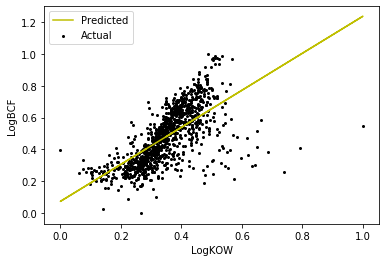

In [39]:
plt.scatter(DS.LogKOW, DS.logBCF, s=4,color='black',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-y',label="Predicted")
plt.legend()
plt.xlabel('LogKOW')
plt.ylabel('LogBCF')
plt.show()

### 9. Manually check whether the results of m and c are correct using excel.

In [40]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
datafile['Predicted'] = y_predicted
print(y_predicted)
print(DS.head(5))


[0.37113402] [0.40135886]
[0.35180412] [0.38368251]
[0.16752577] [0.3847223]
[0.09020619] [0.33481261]
[0.32731959] [0.43723145]
[0.38273196] [0.40499811]
[0.21907216] [0.32233518]
[0.4742268] [0.45126855]
[0.47938144] [0.53497126]
[0.53608247] [0.47778307]
[0.34793814] [0.37900348]
[0.33891753] [0.50949652]
[0.34793814] [0.4195551]
[0.44587629] [0.47934275]
[0.39690722] [0.45386801]
[0.40721649] [0.41019703]
[0.30283505] [0.34001153]
[0.31443299] [0.38108305]
[0.33891753] [0.38732176]
[0.63659794] [0.52145405]
[0.16752577] [0.35768788]
[0.29123711] [0.30153948]
[0.50773196] [0.48610135]
[0.36469072] [0.43515188]
[0.46262887] [0.35664809]
[0.32603093] [0.36808573]
[0.41881443] [0.45022876]
[0.57087629] [0.59579869]
[0.52706186] [0.49493953]
[0.57474227] [0.34521046]
[0.5193299] [0.48506157]
[0.47551546] [0.46686533]
[0.49742268] [0.46426586]
[0.25902062] [0.42735349]
[0.39948454] [0.46218629]
[0.36340206] [0.36444648]
[0.60180412] [0.4970191]
[0.55025773] [0.50065835]
[0.35438144] [0.4

NameError: name 'datafile' is not defined

### 10. Identify MAE,MSE and R2 scores.

In [41]:
#measurements without training and testing
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 0.09781427620860868
Mean Squared Error: 0.017045457595235743
Root Mean Squared Error: 0.1305582536465456


In [42]:
# R2 without train and testing
from sklearn.metrics import r2_score

test_x = np.asanyarray(DS[['LogKOW']])
test_y = np.asanyarray(DS[['logBCF']])
test_y_predicted = regress.predict(test_x)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score:" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 0.09781427620860868
Mean square error (MSE):  0.017045457595235743
R2-score: 0.4415427178917345


In [43]:
#with training and testing

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(DS[['LogKOW']], DS[['logBCF']], test_size=0.20, random_state=42)
print("Training")
print(train_x)
print("Testing")
print(test_x)

from sklearn import linear_model
regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Training
        LogKOW
321   0.315436
757   0.433110
442   0.417450
362   0.218792
377   0.375839
...        ...
330   0.423714
466   0.357494
121   0.648770
1044  0.307830
860   0.338255

[843 rows x 1 columns]
Testing
        LogKOW
260   0.436242
1025  0.351230
845   0.383445
1005  0.345414
88    0.301119
...        ...
25    0.253244
72    0.382550
918   0.302013
44    0.354810
305   0.273826

[211 rows x 1 columns]
Coefficients:  [[1.15129184]]
Intercept:  [0.07543541]


In [44]:
y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)

        LogKOW
260   0.436242
1025  0.351230
845   0.383445
1005  0.345414
88    0.301119
...        ...
25    0.253244
72    0.382550
918   0.302013
44    0.354810
305   0.273826

[211 rows x 1 columns]
        logBCF
260   0.577320
1025  0.283505
845   0.610825
1005  0.554124
88    0.337629
...        ...
25    0.326031
72    0.581186
918   0.369845
44    0.355670
305   0.403351

[211 rows x 1 columns]
[[0.57767681]
 [0.47980413]
 [0.51689272]
 [0.47310758]
 [0.42211076]
 [0.57407098]
 [0.51174153]
 [0.38502216]
 [0.51277177]
 [0.60034207]
 [0.9253824 ]
 [0.46486567]
 [0.43550386]
 [0.4736227 ]
 [0.63433995]
 [0.58849432]
 [0.47619829]
 [0.35050916]
 [0.41953516]
 [0.56428371]
 [0.54213357]
 [0.51380201]
 [0.52307416]
 [0.5508906 ]
 [0.55449644]
 [0.52977071]
 [0.35617548]
 [0.4154142 ]
 [0.44632137]
 [0.47877389]
 [0.44117017]
 [0.22430491]
 [0.45662376]
 [0.5189532 ]
 [0.49525771]
 [0.54419405]
 [0.47001686]
 [0.49577283]
 [0.39583967]
 [0.40614206]
 [0.53904286]
 [0.72294048]
 [0.

In [45]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))

Mean Absolute Error: 0.10566296083847555
Mean Squared Error: 0.019333135223482616
Root Mean Squared Error: 0.1390436450309133


In [46]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(regress, DS[['LogKOW']], DS[['logBCF']], cv = 5,scoring='r2')
print(accuracy)

[0.18991222 0.36840629 0.32901493 0.54948258 0.43612761]


### 10. What are you inferring from the scores?
##### Ans. The cross_val_score method returns us a list with 5 values, these values are of R-squared when K is kept 5. The dataset is divided into 5 parts everytime and for each sub dataset R-sqyared scoring is calculated. The 4th value of "0.54948258" represents the best relative fit for the model.